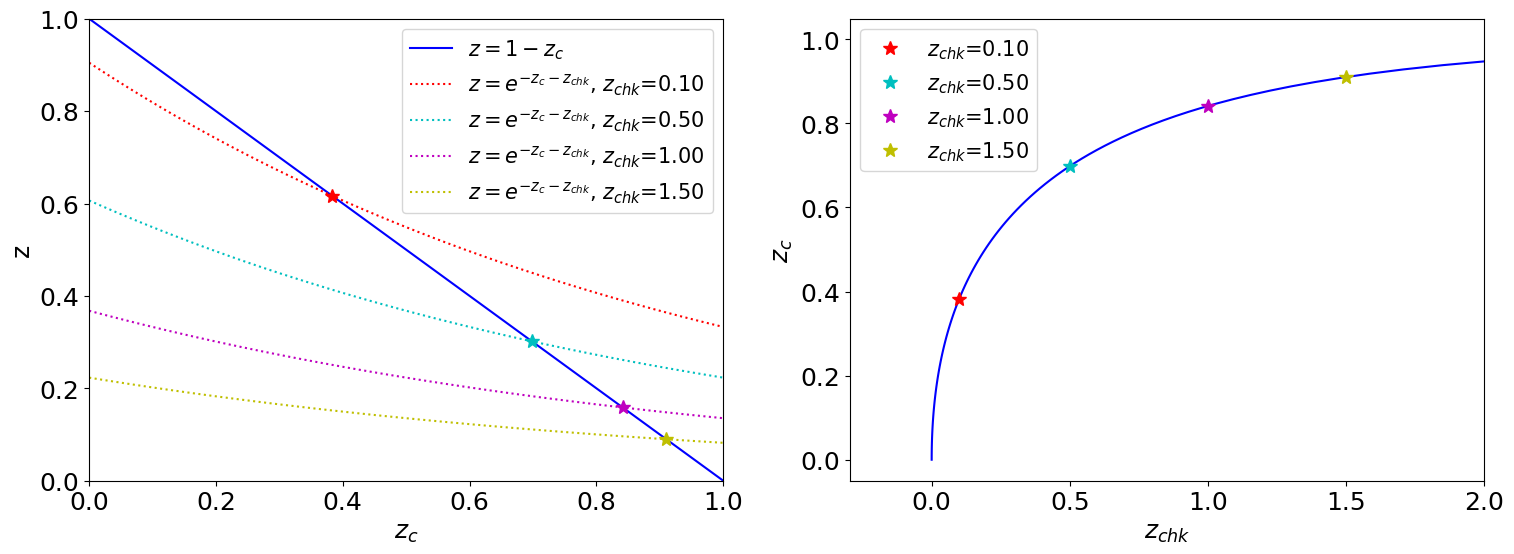

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.optimize import root_scalar

def rootme(z_c, z_chk):
    res = np.exp(-z_c-z_chk) - (1-z_c)
    return res

z_c = np.linspace(0, 0.999,100)
lhs = 1 - z_c
z_chk = np.array([0.1, 0.5, 1, 1.5])

z_chk = z_chk[:, None]
rhs = np.exp(-(z_chk + z_c)).T

z_chk_opt = -z_c - np.log(1-z_c)

opt_zc = []
for z_ck in z_chk[:,0]:
    res = root_scalar(rootme, args=(z_ck), bracket=(0,0.999))
    opt_zc.append(res.root)
opt_zc = np.array(opt_zc)

fig, axs = plt.subplots(ncols=2, figsize=(18,6))

c = ['r', 'c', 'm', 'y']

ax = axs[0]
ax.plot(z_c, lhs, "b-", label="$z=1-z_c$")
for i in range(len(z_chk[:,0])):
    ax.plot(z_c, rhs[:,i], c=c[i], ls=":", label='$z=e^{-z_c-z_{chk}}$, $z_{chk}$='+f'{z_chk[i,0]:.2f}')
    ax.plot([opt_zc[i]], [1-opt_zc[i]], ls="None", ms=10, marker="*", color=c[i])

ax.set_xlim(xmin=0, xmax=1)
ax.set_ylim(ymin=0, ymax=1)

ax.legend(fontsize=15)

ax.set_xlabel("$z_c$", size=18)
ax.set_ylabel("z", size=18)
ax.tick_params(labelsize=18)

ax = axs[1]
ax.plot(z_chk_opt, z_c, "b-")
ax.set_xlabel("$z_{chk}$", size=18)
ax.set_ylabel("$z_c$", size=18)
ax.set_xlim(xmax=2)

for i in range(len(z_chk[:,0])):
    ax.plot([z_chk[i]], [opt_zc[i]], ls="None", ms=10, marker="*", color=c[i], 
            label="$z_{chk}$="+f"{z_chk[i,0]:.2f}")
    
ax.legend(fontsize=15)
ax.tick_params(labelsize=18)

plt.savefig("opt_zc.png", format="png")

plt.show()